In [1]:
#Step 1: Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#Step 2: Load and Clean the Dataset

In [4]:
#Load dataset
df = pd.read_csv("job_dataset.csv")

In [5]:
#Clean extra whitespace and newline characters from descriptions
df['Job Description'] = df['Job Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [6]:
#Preview the data
df.head()

,Job Title,Company Name,Job Description,Location,Job Type,Salary Range,Experience Level,Skills Required,Industry,Posted Date,Employment Mode
0,Mobile App Developer,"Rodriguez, Figueroa and Sanchez",We are seeking a entry level Mobile App Develo...,"Lake Curtis, Saint Vincent and the Grenadines",Full-time,$84k - $96k,Entry,"SQL, Docker, UI Design, JavaScript",Manufacturing,4/12/2025,Remote
1,Cybersecurity Analyst,Garza Inc,We are seeking a entry level Cybersecurity Ana...,"North Jefferyhaven, Netherlands Antilles",Internship,$84k - $117k,Entry,"SQL, Python, NoSQL, Node.js",Technology,2/21/2025,On-site
2,DevOps Engineer,"Gonzalez, Santos and Gardner",We are seeking a senior level DevOps Engineer ...,"South Bridget, Sudan",Internship,$63k - $139k,Senior,"Agile, Data Analysis, Docker, React",Healthcare,2/19/2025,On-site
3,Backend Developer,Wolfe LLC,We are seeking a entry level Backend Developer...,"Ericmouth, Bosnia and Herzegovina",Full-time,$79k - $125k,Entry,"UI Design, NoSQL, Security, Python, TypeScript",Retail,2/28/2025,On-site
4,Data Scientist,Davis-Abbott,We are seeking a entry level Data Scientist to...,"Lindsaymouth, Martinique",Internship,$68k - $96k,Entry,"AWS, React, Python, Data Analysis, Node.js",Education,3/3/2025,Remote


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         120 non-null    object
 1   Company Name      120 non-null    object
 2   Job Description   120 non-null    object
 3   Location          120 non-null    object
 4   Job Type          120 non-null    object
 5   Salary Range      120 non-null    object
 6   Experience Level  120 non-null    object
 7   Skills Required   120 non-null    object
 8   Industry          120 non-null    object
 9   Posted Date       120 non-null    object
 10  Employment Mode   120 non-null    object
dtypes: object(11)
memory usage: 10.4+ KB


In [8]:
#Step 3: Visualize the Dataset

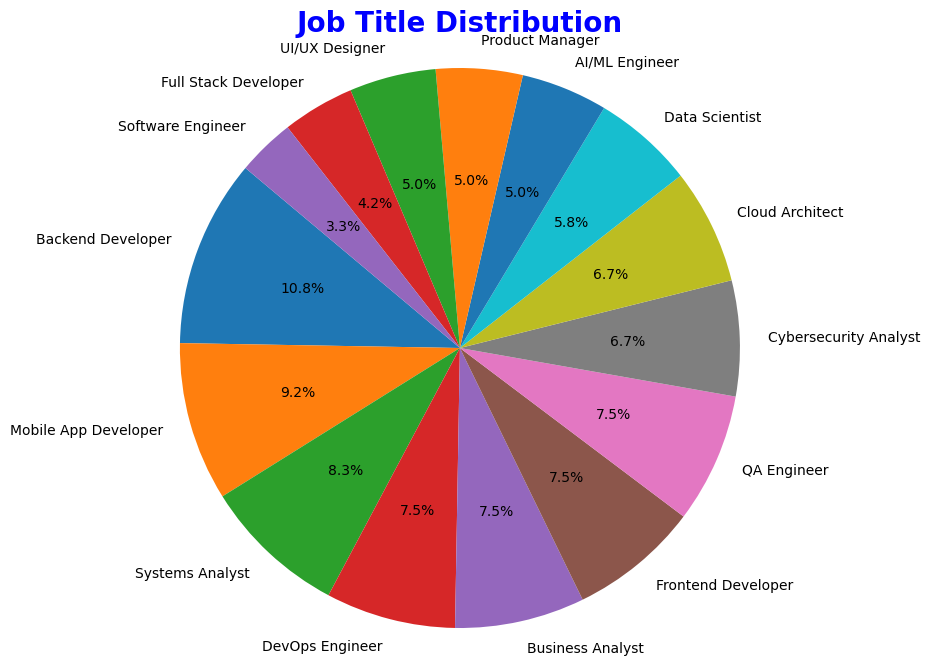

In [9]:
#pie chart for job title
#Mesleklerin tüm veri setindeki oranını görsel olarak temsil eder.
#Bu grafikler, mesleklerin göreceli boyutlarını hızlı bir şekilde anlamamıza yardımcı olabilir.

df = pd.read_csv("job_dataset.csv")

job_counts = df['Job Title'].value_counts() #Meslekleri grubuna ayır

plt.figure(figsize = (10, 8))

plt.pie(
    job_counts,
    labels = job_counts.index,
    autopct = '%1.1f%%', #dilimlerin yüzdeliklerini gösterme
    startangle = 140 #başlangıç açısı
)

plt.title('Job Title Distribution', fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
plt.axis('equal')
plt.show()

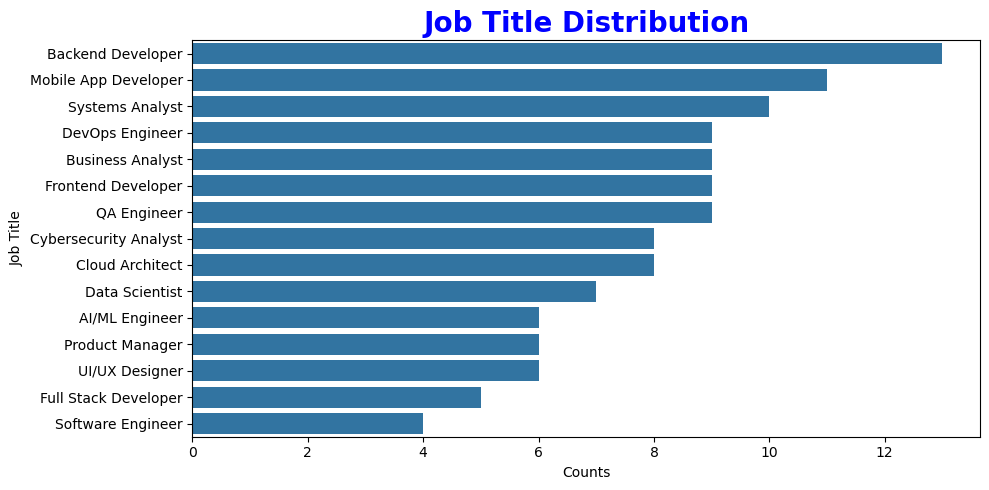

In [10]:
#Count Chart for Job Title
#Mesleklerdeki çalışan sayısını verir.

df = pd.read_csv("job_dataset.csv")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Job Title', order = df['Job Title'].value_counts().index)
plt.title('Job Title Distribution', fontsize=20, fontweight='bold', color='blue', loc='center')
plt.xlabel('Counts')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

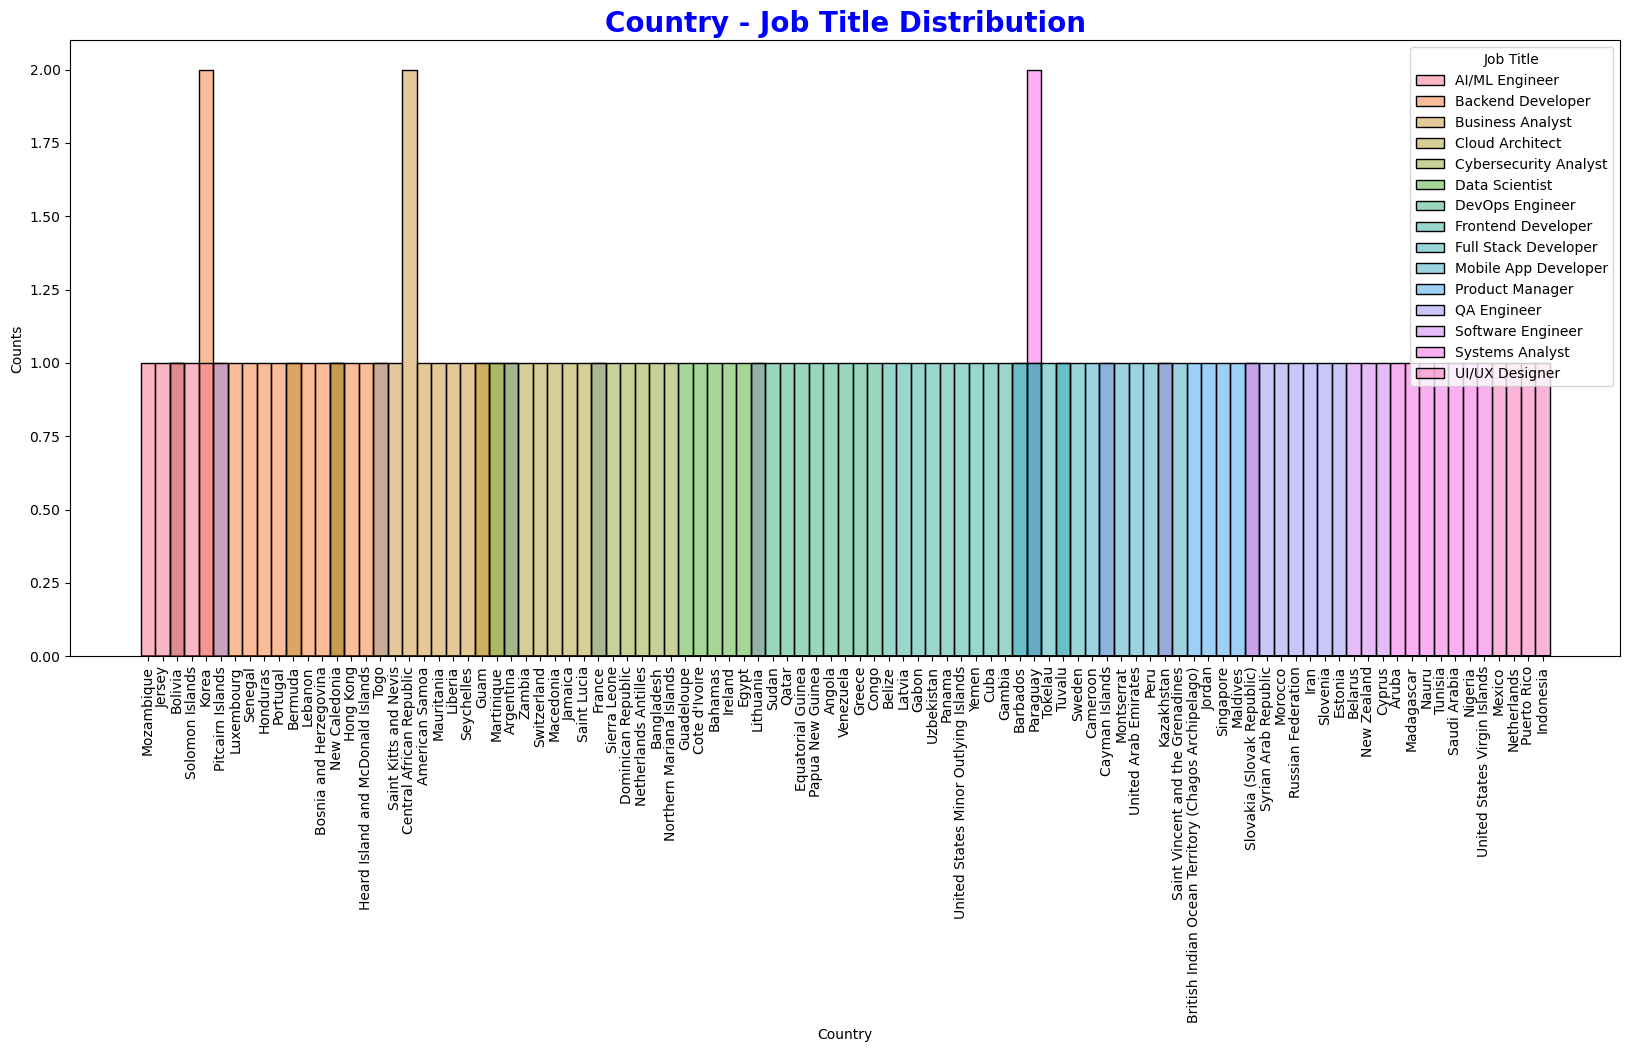

In [11]:
#Count Chart for Job Title and Locaiton
#Ülkelerdeki mesleklerin dağılımını verir

df = pd.read_csv("job_dataset.csv")

df = df.dropna(subset=['Job Title', 'Location'])

for index in df['Location'].index:
    #print(index, df['Location'][index].split(', ')[-1])
    #df['Location'][index] = df['Location'][index].split(', ')[-1]
    df.loc[index, 'Location'] = df['Location'][index].split(', ')[-1]

df =  df.sort_values(by='Job Title')


plt.figure(figsize = (20, 8))
sns.histplot(data = df, x = 'Location', hue = 'Job Title')
plt.title('Country - Job Title Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

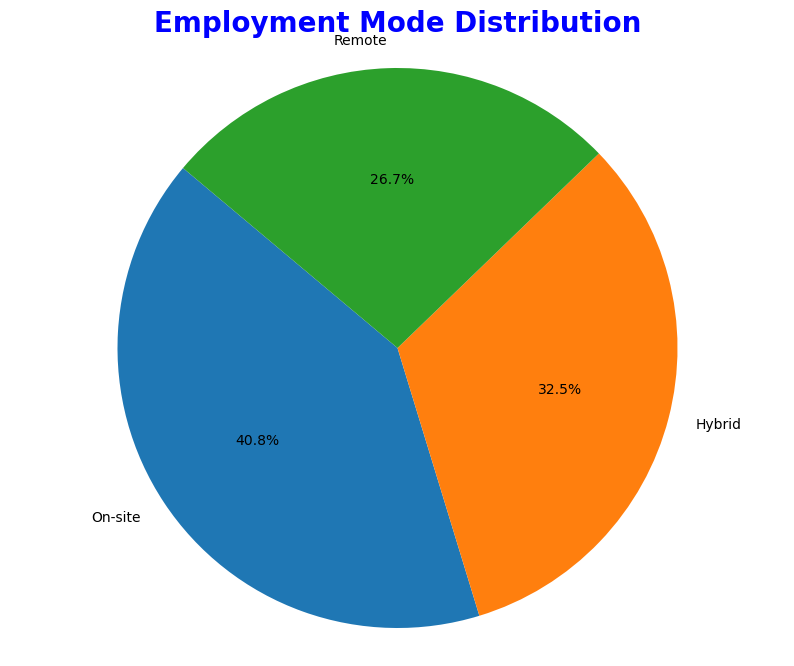

In [12]:
##pie chart for Employment Mode
#Çalışma grupların tüm veri setindeki oranını görsel olarak temsil eder.
#Bu grafikler, çalışma modlarının göreceli boyutlarını hızlı bir şekilde anlamamıza yardımcı olabilir.

df = pd.read_csv("job_dataset.csv")

employment_counts = df['Employment Mode'].value_counts() #Çalışma modlarını grubuna ayır

plt.figure(figsize=(10, 8))
plt.pie(
    employment_counts,
    labels = employment_counts.index,
    autopct = '%1.1f%%', #dilimlerin yüzdeliklerini gösterme
    startangle = 140 #başlangıç açısı
)
plt.title('Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
plt.axis('equal')
plt.show()

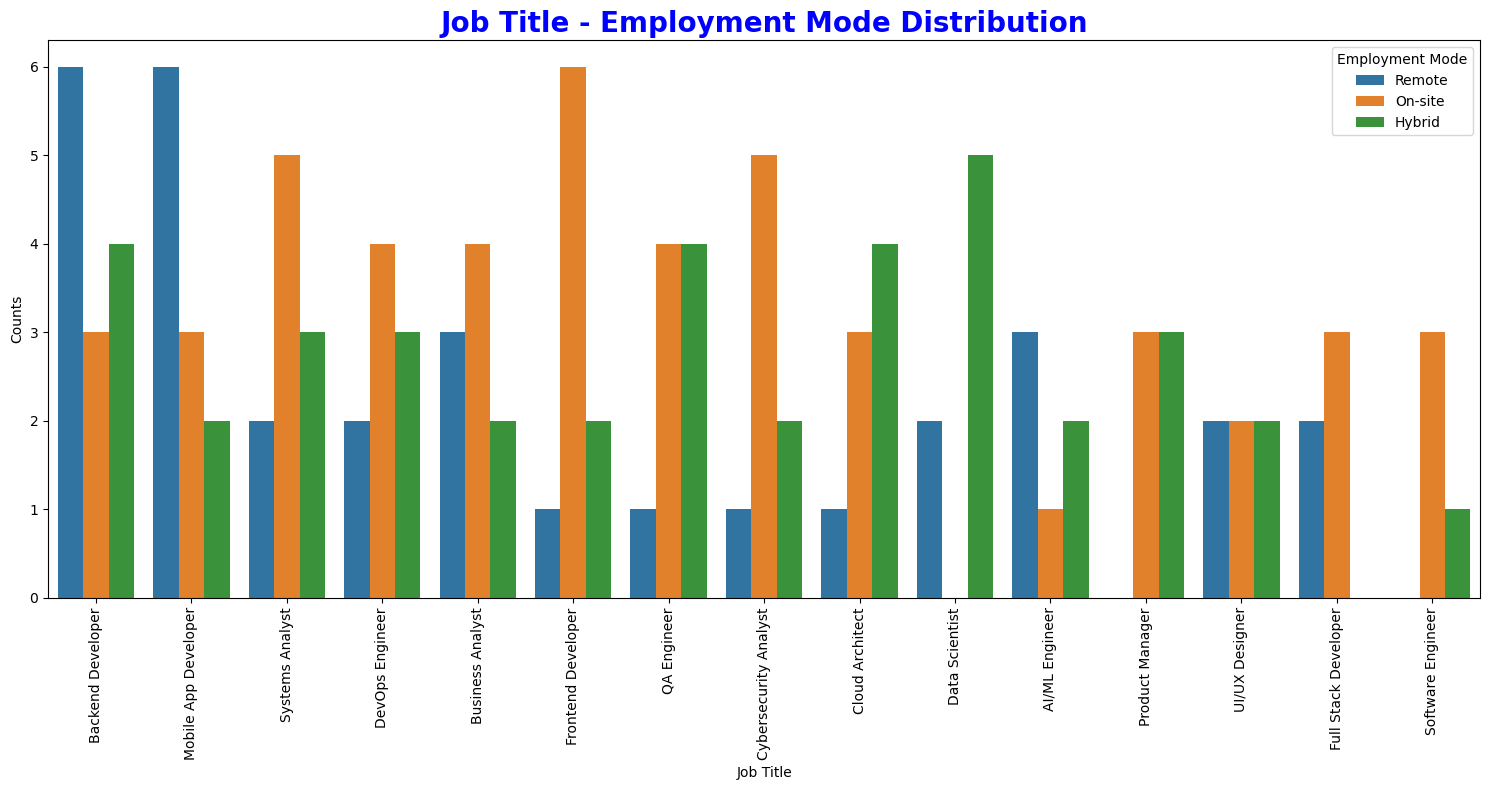

In [13]:
#Count Chart for Job Title and Employment Mode
#Mesleklerin çalışma moduna göre dağılımı verir

df = pd.read_csv('job_dataset.csv')

df = df.dropna(subset = ['Job Title', 'Employment Mode'])

plt.figure(figsize = (15, 8))
sns.countplot(data = df, x = 'Job Title', hue = 'Employment Mode', order = df['Job Title'].value_counts().index)
plt.title('Job Title - Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

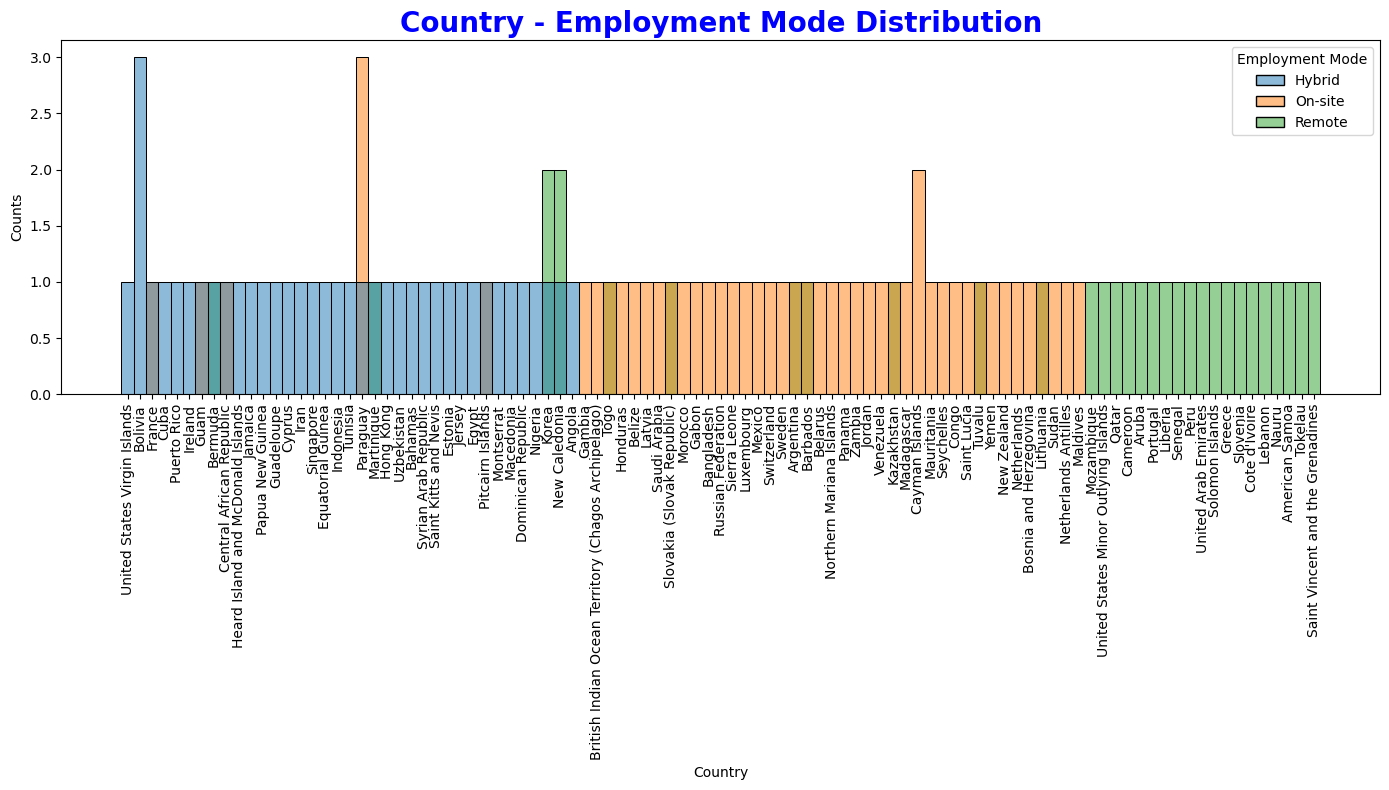

In [14]:
#Histogram Chart for Location and Employment Mode
#Konumlara göre çalışma modunun dağılımını verir.

df = pd.read_csv('job_dataset.csv')

df = df.dropna(subset = ['Location', 'Employment Mode'])

for index in df['Location'].index:
    #print(index, df['Location'][index].split(', ')[-1])
    #df['Location'][index] = df['Location'][index].split(', ')[-1]
    df.loc[index, 'Location'] = df['Location'][index].split(', ')[-1]

df =  df.sort_values(by = 'Employment Mode')

plt.figure(figsize = (14, 8))
sns.histplot(data = df, x = 'Location', hue = 'Employment Mode' )
plt.title('Country - Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

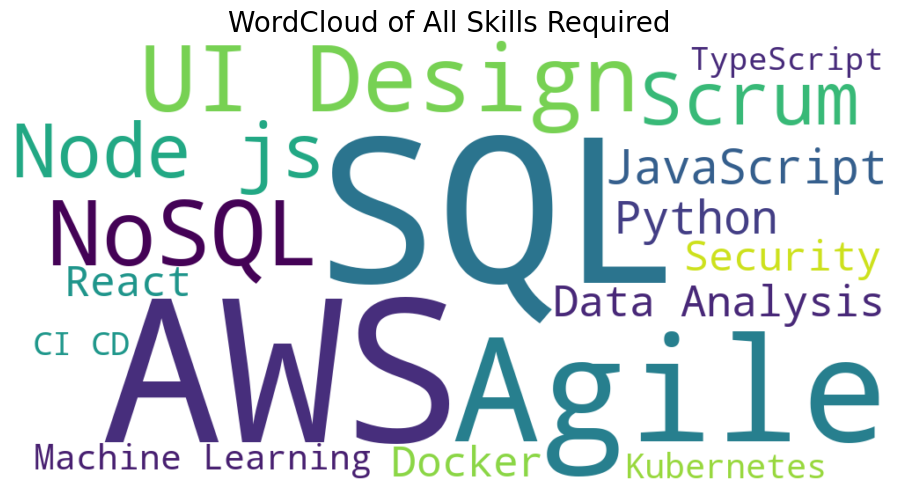

In [15]:
#WordCloud for Skills Required
#İş Gereksinimlerindeki kelimelerin frekans ve önemine görselleştirmek için.
#Daha sık ve daha önemli olanlar daha büyük fontla gösterilmekte.

df = pd.read_csv("job_dataset.csv")

all_skills = df['Skills Required'].str.split(', ').sum()

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(' '.join(all_skills))
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("WordCloud of All Skills Required", fontsize = 20)
plt.tight_layout()
plt.show()

In [16]:
#WordCloud kütüphanesi hatası için ilk önce aşağıdaki kodu çalıştırdım.
#import sys
#print(sys.executable)

#Sonrasında terminalde alttaki kod satırını açıltırdım.Sorun çözüldü
#c:/Users/asus/anaconda3/python -m pip install wordcloud 

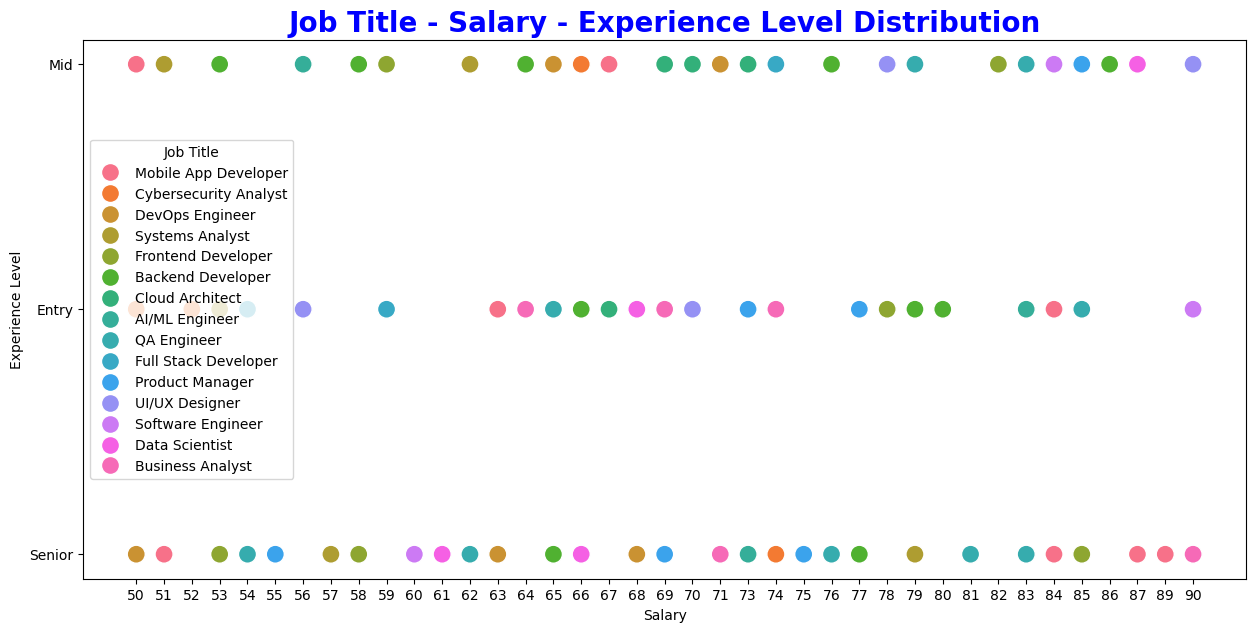

In [17]:
#Scatter Chart for Job Title - Salary - Experience Level
#Mesleklerin tecrübeye bağlı olarak maaşların dağılımını gösterir.

df = pd.read_csv('job_dataset.csv')

df = df.dropna(subset = ['Job Title', 'Salary Range', 'Experience Level'])


for index in df['Salary Range'].index:
    df.loc[index, 'Salary Range'] = ((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])
    #print(((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])) 
    
df =  df.sort_values(by = ('Salary Range'))

plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, y = 'Experience Level', x = 'Salary Range', hue = "Job Title", s = 170)
plt.title('Job Title - Salary - Experience Level Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Salary')
plt.show()

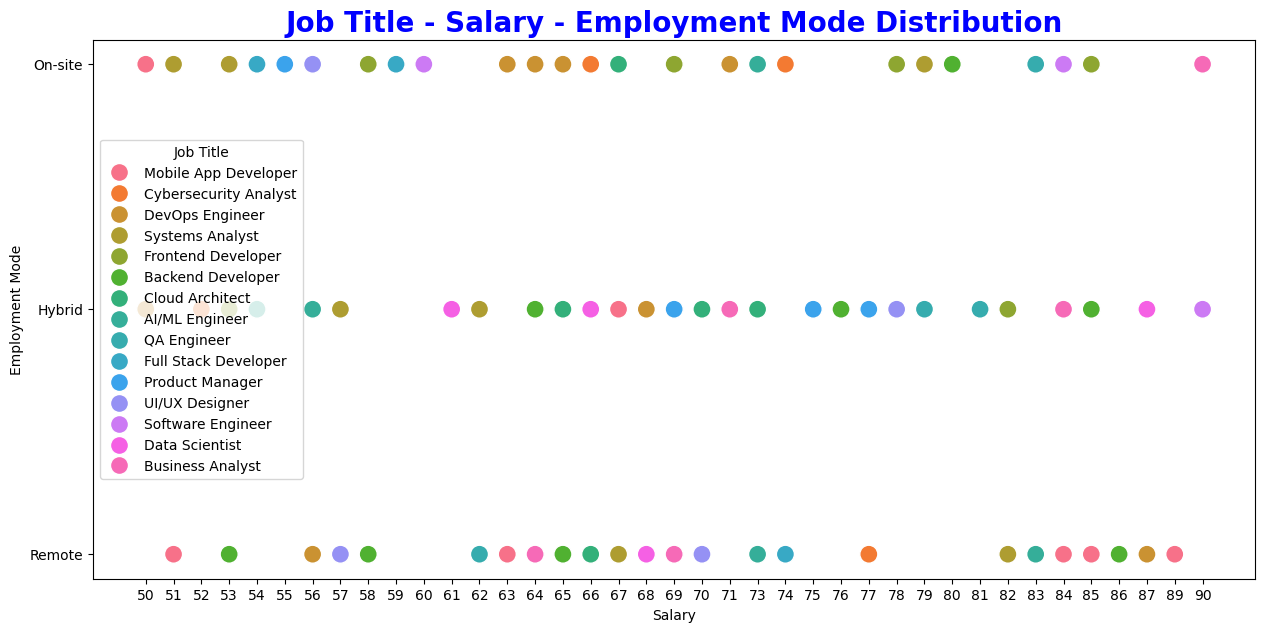

In [18]:
#Scatter Chart for Job Title - Salary - Employment Mode
#Mesleklerin çalışma moduna bağlı olarak maaşların dağılımını gösterir.

df = pd.read_csv('job_dataset.csv')

# Eksik veya gereksiz verileri temizleme
df = df.dropna(subset = ['Job Title', 'Salary Range', 'Employment Mode'])


for index in df['Salary Range'].index:
    df.loc[index, 'Salary Range'] = ((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])
    #print(((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])) 
    
df =  df.sort_values(by = ('Salary Range'))

plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, y = 'Employment Mode', x = 'Salary Range', hue = "Job Title", s = 170)
plt.title('Job Title - Salary - Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Salary')
plt.show()

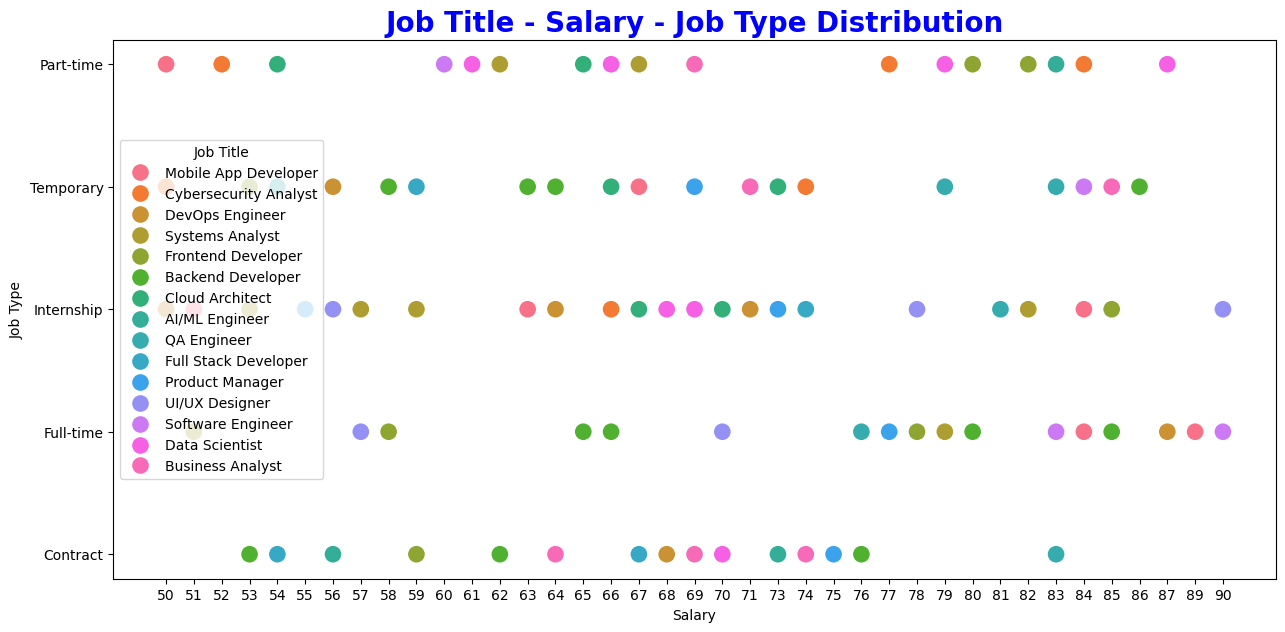

In [19]:
#Scatter Chart for Job Title - Salary - Job Type
#Mesleklerin iş türüne bağlı olarak maaşların dağılımını gösterir.

df = pd.read_csv('job_dataset.csv')

df = df.dropna(subset=['Job Title', 'Salary Range', 'Job Type'])

for index in df['Salary Range'].index:
    df.loc[index, 'Salary Range'] = ((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])
    #print(((str(df['Salary Range'][index]).split('k - $')[0]).split('$')[-1])) 
    
df =  df.sort_values(by = ('Salary Range'))

plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, y = 'Job Type', x = 'Salary Range', hue = "Job Title", s = 170)
plt.title('Job Title - Salary - Job Type Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Salary')
plt.show()